## Pneumonia detection using CNN

The data set consists of chest XRay images.

The goal is to have high recall as we do not want to misclassify as normal when the patient actually has pneumonia.

Dataset available at https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [2]:
# import of libraries
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory


In [3]:
train_path = 'data/train'
val_path = 'data/val'
test_path = 'data/test'

IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
EPOCH = 10
LEARNING_RATE = 0.01


In [4]:
# Import the images and prepare the data
train_set = image_dataset_from_directory(train_path,                                        
                                        image_size = IMAGE_SIZE,
                                        batch_size=BATCH_SIZE)

Found 5216 files belonging to 2 classes.


In [5]:
val_set = image_dataset_from_directory(val_path,                                        
                                        image_size = IMAGE_SIZE,
                                        batch_size=BATCH_SIZE)

Found 23 files belonging to 2 classes.


In [6]:
test_set = image_dataset_from_directory(test_path,                                        
                                        image_size = IMAGE_SIZE,
                                        batch_size=BATCH_SIZE)

Found 617 files belonging to 2 classes.


In [7]:
train_set.class_names

['NORMAL', 'PNEUMONIA']

In [8]:
import pathlib

# Lets find the image count for the 2 categories
normal_count = len(list(pathlib.Path(train_path).glob("NORMAL/*.jpeg")))
pneumonia_count = len(list(pathlib.Path(train_path).glob("PNEUMONIA/*.jpeg")))

<AxesSubplot:>

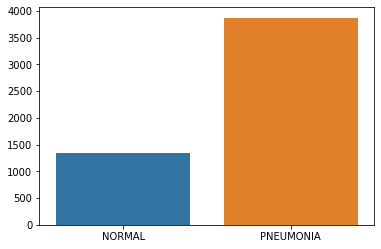

In [9]:
sns.barplot(x=["NORMAL","PNEUMONIA"], y = [normal_count,pneumonia_count])

#### Observation:
Imbalanced Dataset, there are more image of patients with Pneumonia. Hence the appropriate weights need to be applied when training.

In [10]:
# finding class weights manually

total_count = normal_count + pneumonia_count
n_class = 2
normal_class_weight = total_count / (n_class * normal_count)
pneumonia_class_weight = total_count / (n_class * pneumonia_count)

class_weight = {0:normal_class_weight, 1:pneumonia_class_weight}
print(class_weight)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [14]:
# Create the model from scratch

model = Sequential()
model.add(Rescaling(1.0/255))
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(250,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall(name='recall')])

In [16]:
history = model.fit(train_set,validation_data=val_set,epochs=3,class_weight=class_weight)

Epoch 1/3
163/163 [==============================] - 137s 795ms/step - loss: 0.2338 - recall: 0.8945 - val_loss: 0.1969 - val_recall: 0.9333
Epoch 2/3
163/163 [==============================] - 122s 740ms/step - loss: 0.0864 - recall: 0.9654 - val_loss: 0.1019 - val_recall: 1.0000
Epoch 3/3
163/163 [==============================] - 121s 738ms/step - loss: 0.0733 - recall: 0.9703 - val_loss: 0.0464 - val_recall: 1.0000


In [17]:
y_pred = model.predict(test_set)
y_pred

20/20 [==============================] - 9s 278ms/step


array([[9.99653280e-01],
       [9.99997318e-01],
       [9.99989033e-01],
       [8.11324120e-01],
       [6.80783212e-01],
       [9.99861658e-01],
       [9.99750674e-01],
       [9.99948382e-01],
       [9.86579835e-01],
       [5.52472309e-04],
       [9.99741554e-01],
       [1.20399669e-02],
       [9.99752283e-01],
       [2.32227772e-01],
       [9.99996364e-01],
       [9.98441756e-01],
       [1.36159390e-01],
       [9.99692857e-01],
       [9.99927759e-01],
       [9.97596562e-01],
       [9.97328103e-01],
       [9.38786507e-01],
       [8.55209768e-01],
       [3.91755067e-03],
       [3.24018091e-01],
       [9.99890804e-01],
       [1.24103064e-03],
       [3.05521139e-03],
       [9.75348949e-01],
       [4.19387035e-02],
       [9.98665869e-01],
       [6.12499006e-02],
       [9.99944985e-01],
       [1.90928485e-02],
       [9.59307611e-01],
       [9.99987483e-01],
       [9.99997735e-01],
       [7.91157782e-01],
       [1.15274489e-02],
       [9.99999344e-01],


In [18]:
y_pred = np.where(y_pred > 0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [26]:
y_test = []
for path in test_set.file_paths:
    if 'PNEUMONIA' in path:
        y_test.append(1)
    else:
        y_test.append(0)

In [27]:
y_test

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)


array([[ 50, 184],
       [ 94, 289]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.21      0.26       234
           1       0.61      0.75      0.68       383

    accuracy                           0.55       617
   macro avg       0.48      0.48      0.47       617
weighted avg       0.51      0.55      0.52       617

